In [1]:
!pip3 install pybind11

In [2]:
%%bash
#find / -name 'ndarrayobject.h'
c++ -O3 -Wall -shared -std=c++11 -fPIC -fopenmp $(python3 -m pybind11 --includes) -I$CONDA_PREFIX/include/opencv4/ -I$CONDA_PREFIX/lib/python3.8/site-packages/numpy/core/include/ -L$CONDA_PREFIX/lib/ sky_image_generator.cpp -o sky_image_generator$(python3-config --extension-suffix) -lopencv_core -lopencv_imgcodecs


In file included from /home/dancejok/miniconda3/envs/sky/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1960,
                 from /home/dancejok/miniconda3/envs/sky/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from sky_image_generator.cpp:8:
/home/dancejok/miniconda3/envs/sky/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from sky_image_generator.cpp:6:
sky_image_generator.h: In function ‘color sky_radiance(float, float)’:
sky_image_generator.h:129:22: warning: unused variable ‘w2’ [-Wunused-variable]
  129 |         const double w2 = 1;
      |                      ^~
sky_image_generator.h:135:22: warning: unused variable ‘solar_radiance_rgb’ [-Wunused-variable

In [3]:
%ls -l sky_image_generator*.so

-rwxr-xr-x 1 dancejok dancejok 194256 Nov  2 12:11 sky_image_generator.cpython-38-x86_64-linux-gnu.so*


In [4]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [5]:
import sky_image_generator

In [6]:
import numpy as np
import math
import os

In [7]:
from matplotlib import pyplot as plt
import cv2

In [8]:
import pandas as pd

In [9]:
#model_img = sky_image_generator.generate_image(1000, 0, 0, 0, 0)
coordinate_img = np.array(sky_image_generator.project_cloudplane_coordinates(128)).reshape(3,128,128)
coordinate_img = np.moveaxis(coordinate_img, 0, 2)

In [10]:
layer = coordinate_img[:,:,0] 
layer.min(), layer.max()

(-0.9997520446777344, 0.9998760223388672)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


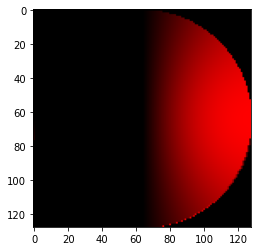

In [11]:
#plt.imshow(cv2.cvtColor(model_img*5, cv2.COLOR_BGR2RGB)) # for spectral version
#plt.imshow(cv2.cvtColor(model_img*0.05, cv2.COLOR_BGR2RGB)) # for XYZ
plt.imshow(coordinate_img)

In [12]:
# load the shooting metadata
data = pd.read_csv("light_cloud_cover.csv")

In [13]:
#shoot, photo_index = '2019-06-04_1117_ronan', '0018' # done

#shoot, photo_index = '2019-06-07_1306_hammerschmiede', '1908' # WIP

#shoot, photo_index = '2019-06-18_0523_prague_chodska_21_rooftop', '0033'

#shoot, photo_index = '2019-06-20_0454_prague_chodska_21_rooftop', '2315'

#shoot, photo_index = '2019-06-24_0504_prague_chodska_21_rooftop', '7694' # done
shoot, photo_index = '2019-06-24_0504_prague_chodska_21_rooftop', '0418' # done2

#shoot, photo_index = '2019-06-26_0848_prague_chodska_21_rooftop', '6703'

#shoot, photo_index = '2019-06-26_1311_prague_chodska_21_rooftop', '6373'

#shoot, photo_index = '2019-06-26_1855_prague_chodska_21_rooftop', '8024'

#shoot, photo_index = '2019-06-29_1113_divoka_sarka', '3732'

#shoot, photo_index = '2019-07-15_1929_prague_chodska_21_rooftop', '6094'

#shoot, photo_index = '2019-07-16_1221_prague_chodska_21_rooftop', '1747'

#shoot, photo_index = '2019-07-17_1732_prague_chodska_21_rooftop', '0866'

#shoot, photo_index = '2019-07-17_1957_prague_chodska_21_rooftop', '2428'

#shoot, photo_index = '2019-08-06_0933_santa_cruz_villa_nuova', '4039'

#shoot, photo_index = '2019-08-06_1657_santa_cruz_villa_nuova', '5701'

#shoot, photo_index = '2019-08-08_1048_santa_cruz_villa_nuova', '6339'

#shoot, photo_index = '2019-08-09_0800_santa_cruz_villa_nuova', '8685'
#shoot, photo_index = '2019-08-09_0800_santa_cruz_villa_nuova', '1746'

#shoot, photo_index = '2019-08-09_1800_santa_cruz_villa_nuova', '7147'

#shoot, photo_index = '2019-08-10_1000_santa_cruz_villa_nuova', '2000' # done2

#shoot, photo_index = '2019-08-16_1130_burbank_1200_riverside', '9219'
#shoot, photo_index = '2019-08-16_1130_burbank_1200_riverside', '2145'

#shoot, photo_index = '2019-08-16_1824_burbank_1200_riverside', '2721'

#shoot, photo_index = '2019-08-18_0918_burbank_1200_riverside', '3128'

#shoot, photo_index = '2019-08-18_1841_burbank_1200_riverside', '6671'

In [14]:
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


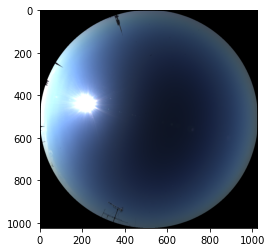

In [15]:
fname = '/projects/SkyGAN/clouds_fisheye/processed/'+shoot+'/1K_EXR/IMG_'+photo_index+'_hdr.exr'
real_img = cv2.imread(fname, flags = cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR)

view_multiplier = 8
plt.imshow(cv2.cvtColor(real_img*view_multiplier, cv2.COLOR_BGR2RGB))

In [16]:
# look up image's elevation and azimuth in the shooting metadata
data_line = data[data['img_fname'] == fname]
assert len(data_line) == 1
elevation, azimuth = data_line['img_elevation'].iloc[0], data_line['img_azimuth'].iloc[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 15.3 µs


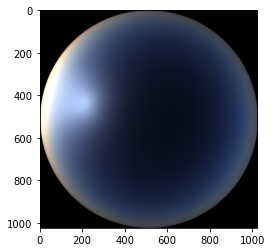

In [17]:
# verify (visually) the generated sky image looks similar
%time
model_img = sky_image_generator.generate_image(
    1024, #resolution
    elevation /180*np.pi, # elevation
    math.fmod(360 + 270 - azimuth, 360) /180*np.pi, # azimuth
    100, # visibility (in km)
    0.1 # ground albedo
)
plt.imshow(cv2.cvtColor(model_img/(2**8)*view_multiplier, cv2.COLOR_BGR2RGB))

0.01276397705078125 0.14892578125


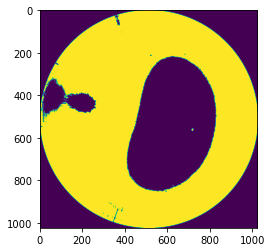

In [18]:
# masking out irrelevant areas (close to the Sun and outside the projected skydome)
#t_min = 1e-10
#t_min = 0.003
#t_max = 0.04
t_min, t_max = np.percentile(real_img, [30, 99])
print(t_min, t_max)
mask_thresh = cv2.inRange(real_img, (t_min, t_min, t_min), (t_max, t_max, t_max))
mask_thresh = mask_thresh.astype("bool")
plt.imshow(mask_thresh)

In [19]:
# https://gist.github.com/Quasimondo/c3590226c924a06b276d606f4f189639
def RGB2YUV(rgb):
    m = np.array([[ 0.29900, -0.16874,  0.50000],
                 [0.58700, -0.33126, -0.41869],
                 [ 0.11400, 0.50000, -0.08131]])
     
    yuv = np.dot(rgb,m)
    yuv[:,:,1:]+=128.0
    return yuv

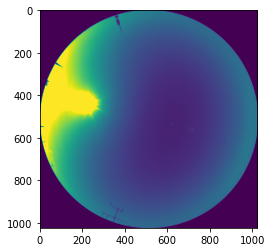

In [20]:
#real_img_y = cv2.cvtColor(real_img*10000, cv2.COLOR_BGR2YUV)[..., 0]
real_img_y = RGB2YUV(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))[..., 0]
#print(np.percentile(real_img, [0,5,25,50,75,95,100]))
real_img_y = np.clip(real_img_y, *np.percentile(real_img, [5, 95]))
#print(np.percentile(real_img, [0,5,25,50,75,95,100]))
real_img_y = real_img_y - real_img_y.min()
#print(np.percentile(real_img, [0,5,25,50,75,95,100]))
real_img_y = real_img_y / real_img_y.max()
#print(np.percentile(real_img, [0,5,25,50,75,95,100]))
#print(real_img_y.shape, real_img_y.min(), real_img_y.mean(), real_img_y.max())
plt.imshow(real_img_y)
#print(np.percentile(real_img, [0,5,25,50,75,95,100]))

0.12775620284387695 0.9408480847359257


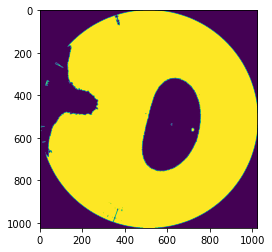

In [21]:
t_min, t_max = np.percentile(real_img_y, [30, 95])
print(t_min, t_max)
mask_thresh = cv2.inRange(real_img_y, t_min, t_max)
mask_thresh = mask_thresh.astype("bool")
plt.imshow(mask_thresh)

In [22]:
mask_name = fname.split('/')[5] + '-' + fname.split('/')[7].replace('.exr', '')
mask_fname_base = 'masks/' + mask_name + '/'
if not os.path.isdir(mask_fname_base):
    os.mkdir(mask_fname_base)

In [23]:
#save the real image (as a reference for manual mask painting)
cv2.imwrite(mask_fname_base + 'real_img.png', real_img * 255 * 10)

True

In [24]:
# save the mask
cv2.imwrite(mask_fname_base + 'mask_thresh.png', mask_thresh * 255)

True

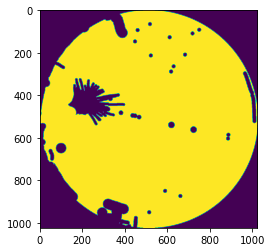

In [25]:
# laod and use a manually-painted mask
mask_thresh_read = cv2.imread(mask_fname_base + 'mask.png') / 255
mask_thresh_read = mask_thresh_read.astype("bool")
mask_thresh_read.mean()
mask_thresh_read = mask_thresh_read[:, :, 0] # use only the "red" channel
mask_thresh_read.shape
mask_thresh_read = mask_thresh_read > 0.5
plt.imshow(mask_thresh_read)
mask_thresh = mask_thresh_read

In [26]:
#(mask_thresh ^ mask_thresh_read).abs().max()
#print((1-mask_sat)[500][500])
#print((real_img*mask_sat).mean())

In [27]:
rgb_mask = np.repeat(mask_thresh[:, :, np.newaxis], 3, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


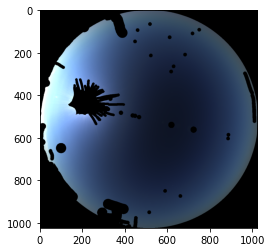

In [28]:
# masked-out real image
#cv2.imwrite('masked_real_img.png', real_img*rgb_mask*30 * 255)
plt.imshow(cv2.cvtColor(real_img*rgb_mask*view_multiplier, cv2.COLOR_BGR2RGB))

# Optimizing the sky model parameters

In [30]:
!pip install scipy

/bin/bash: /home/dancejok/miniconda3/envs/sky/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 22.9 MB/s eta 0:00:0000:0100:01


In [31]:
import scipy.optimize

In [32]:
visibility_min = 20
visibility_max = 131.8

def make_visibility(v): # [0,1] -> [visibility_min, visibility_max]
    return visibility_min + (visibility_max - visibility_min) * v

make_visibility(0.5301181736571103)

79.26721181486494

In [33]:
def penalize_out_of_range(value, minimum=0, maximum=1):
    if value < minimum:
        return minimum - value
    if value > 1:
        return value - maximum
    return 0

In [34]:
# "exposure": find a multiplier of the generated sky image that minimizes the difference to the real image

def generate_sky_image_exposure(opt_params):
    exposure = opt_params[0]
    return model_img * np.power(2, exposure)

def extra_loss_exposure(opt_params):
    return 0

optimise_exposure = {
    #                  e
    'initial_values': [-8],
    'generate_sky_image': generate_sky_image_exposure,
    'extra_loss': extra_loss_exposure
}

In [35]:
# "exposure, visibility and ground_albedo": find an exposure and model parameters (visibility and ground albedo)

resolution = 1024

def generate_sky_image_exposure_visibility_groundalbedo(opt_params):
    exposure, visibility, ground_albedo = opt_params[0], make_visibility(opt_params[1]), opt_params[2]
    
    sun_phi = math.fmod(360 + 270 - azimuth, 360) /180*np.pi # azimuth
    sun_theta = elevation /180*np.pi # elevation
    
    print('generate_sky_image(', [exposure, visibility, ground_albedo], ')')
    
    model_img = sky_image_generator.generate_image(
        1024, #resolution
        sun_theta, # elevation
        sun_phi, # azimuth
        visibility, # visibility (in km)
        ground_albedo # ground albedo
    )
    return model_img * np.power(2, exposure)

def extra_loss_exposure_visibility_groundalbedo(opt_params):
    exposure, visibility01, ground_albedo = opt_params[0], opt_params[1], opt_params[2]
    extra = 0
    # constrain parameters to their limits parameters (HACK. maybe using a constrained optimizer would be more suitable)
    extra += penalize_out_of_range(visibility01)
    extra += penalize_out_of_range(ground_albedo)
    
    print('extra_loss', extra)
    return extra

optimise_exposure_visibility_groundalbedo = {
    #                   exposure, visibility, ground_albedo
    #'initial_values': [       -8,        0.5,           0.5], # unused
    'generate_sky_image': generate_sky_image_exposure_visibility_groundalbedo,
    'extra_loss': extra_loss_exposure_visibility_groundalbedo
}

In [36]:
#generate_sky_image([5.0001]).mean()

In [37]:
def L1(generated_img, real_img):
    #plt.imshow(cv2.cvtColor(generated_img*5, cv2.COLOR_BGR2RGB))
    multiply = 10
    diff = generated_img - real_img
    cv2.imwrite('last_diff.png', diff * 255 * multiply)
    diff_masked = np.abs(diff)*rgb_mask
    cv2.imwrite('last_diff_masked.png', diff_masked * 255 * multiply)
    return (diff_masked).mean()
    
compute_error_metric = L1

In [38]:
%%time
# Optimise the exposure
# (yes, it could be done analytically, but this is more flexible)

def loss(opt_params):
    global best_value, best_params
    opt_params_log.append(opt_params)
    print('loss(', opt_params, ')')

    generated_img = optimise_settings['generate_sky_image'](opt_params)
    #print('mean', generated_img.mean())
    assert(generated_img.shape == real_img.shape)

    error_value = compute_error_metric(generated_img, real_img)
    print('error_value', error_value)

    loss_value = optimise_settings['extra_loss'](opt_params) + error_value
    
    opt_loss_log.append(loss_value)
    
    # save the parameters of the best iteration
    if loss_value < best_value:
        best_value = loss_value
        best_params = opt_params
    
    return loss_value


best_value, best_params = float('inf'), None # remember the best encountered parameters, useful in case we leave the minimum
opt_loss_log, opt_params_log = [], []

optimise_settings = optimise_exposure
optim_res = scipy.optimize.minimize(
    loss,
    np.array(optimise_settings['initial_values']),
    options={'eps': 1e-04, 'maxiter': 15#, 'gtol': 1e-07
            }
)
opt_params_log_exposure = opt_params_log
best_params_exposure = best_params
print(optim_res)
assert optim_res.success

loss( [-8.] )
error_value 0.005586405
loss( [-7.9999] )
error_value 0.005585242
loss( [-7.98837244] )
error_value 0.00545195
loss( [-7.98827244] )
error_value 0.0054507987
loss( [-7.94186219] )
error_value 0.0049258894
loss( [-7.94176219] )
error_value 0.0049247774
loss( [-7.75582119] )
error_value 0.0036124305
loss( [-7.75572119] )
error_value 0.0036122154
loss( [-7.700386] )
error_value 0.0035898231
loss( [-7.700286] )
error_value 0.0035900085
loss( [-7.72502645] )
error_value 0.0035720903
loss( [-7.72492645] )
error_value 0.0035720605
loss( [-7.72161305] )
error_value 0.0035714328
loss( [-7.72151305] )
error_value 0.0035714281
loss( [-7.72098094] )
error_value 0.0035714123
loss( [-7.72088094] )
error_value 0.0035714114
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.003571412293240428
        x: [-7.721e+00]
      nit: 5
      jac: [-9.313e-06]
 hess_inv: [[ 1.357e+01]]
     nfev: 16
     njev: 8
CPU times: user 1.01 s, sys: 55 ms, total: 1

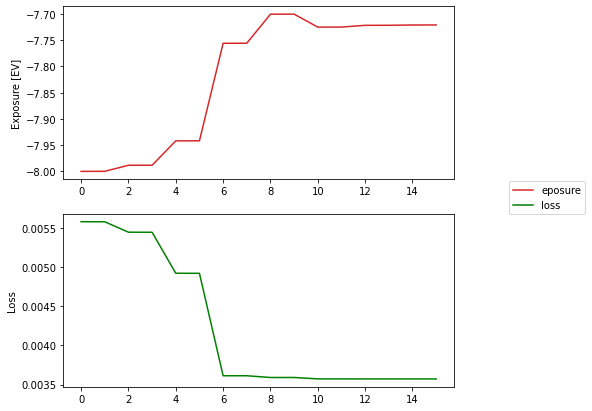

In [39]:
log = np.array(opt_params_log)
fig, ax = plt.subplots(2, figsize=(7, 7))
ax[0].plot(log[:, 0], color='C3', label='eposure')
ax[0].set_ylabel('Exposure [EV]')

ax[1].plot(opt_loss_log, color='green', label='loss')
ax[1].set_ylabel('Loss')

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [40]:
%%time
# Optimise the visibility distance and ground albedo

best_value, best_params = float('inf'), None # remember the best encountered parameters, useful in case we leave the minimum
opt_loss_log, opt_params_log = [], []

def prepend_opt_params_and_call(prefix, what_to_call):
    def bla(opt_params):
        return what_to_call(np.concatenate((prefix, opt_params), axis=None))
    return bla

optimise_visibility_groundalbedo = {
    #                  visibility, ground_albedo
    'initial_values': [       0.5,           0.5],
    'generate_sky_image': prepend_opt_params_and_call(best_params_exposure, generate_sky_image_exposure_visibility_groundalbedo),
    'extra_loss': prepend_opt_params_and_call(best_params_exposure, extra_loss_exposure_visibility_groundalbedo)
}

optimise_settings = optimise_visibility_groundalbedo
optim_res = scipy.optimize.minimize(
    loss,
    np.array(optimise_settings['initial_values']), # replace the initial exposure with the found one
    method='L-BFGS-B',
    bounds=[(0,1), (0,1)],
    options={'eps': 1e-04, 'maxiter': 20, 'pgtol': 1e-07}
)
opt_params_log_visibility_groundalbedo = opt_params_log
best_params_visibility_groundalbedo = best_params
print(optim_res)
assert optim_res.success

<timed exec>:19: OptimizeWarning: Unknown solver options: pgtol


loss( [0.5 0.5] )
generate_sky_image( [-7.720880943361727, 75.9, 0.5] )
error_value 0.009248389
extra_loss 0
loss( [0.5001 0.5   ] )
generate_sky_image( [-7.720880943361727, 75.91118, 0.5] )
error_value 0.009247504
extra_loss 0
loss( [0.5    0.5001] )
generate_sky_image( [-7.720880943361727, 75.9, 0.5001] )
error_value 0.009250282
extra_loss 0
loss( [0.50884756 0.48106621] )
generate_sky_image( [-7.720880943361727, 76.88915770649922, 0.4810662120580652] )
error_value 0.008815357
extra_loss 0
loss( [0.50894756 0.48106621] )
generate_sky_image( [-7.720880943361727, 76.90033770649922, 0.4810662120580652] )
error_value 0.008814496
extra_loss 0
loss( [0.50884756 0.48116621] )
generate_sky_image( [-7.720880943361727, 76.88915770649922, 0.4811662120580652] )
error_value 0.008817232
extra_loss 0
loss( [0.85220462 0.        ] )
generate_sky_image( [-7.720880943361727, 115.276476284664, 0.0] )
error_value 0.0041700504
extra_loss 0
loss( [0.85230462 0.        ] )
generate_sky_image( [-7.720880943

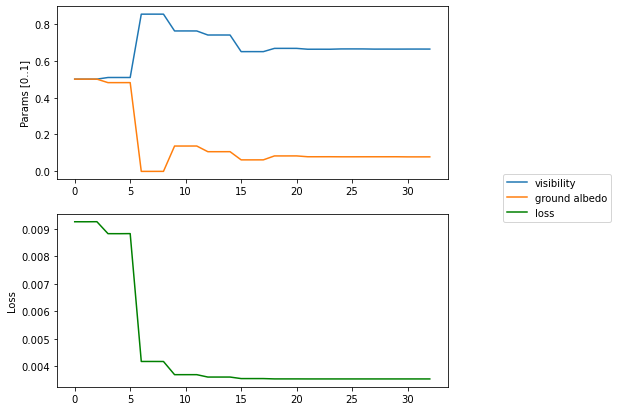

In [41]:
log = np.array(opt_params_log)
fig, ax = plt.subplots(2, figsize=(7, 7))
ax[0].plot(log[:, 0], color='C0', label='visibility')
ax[0].plot(log[:, 1], color='C1', label='ground albedo')
ax[0].set_ylabel('Params [0..1]')

ax[1].plot(opt_loss_log, color='green', label='loss')
ax[1].set_ylabel('Loss')

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
%%time
# Optimise (fine-tune) all the params at the same time: exposure, visibility distance and ground albedo

best_value, best_params = float('inf'), None # remember the best encountered parameters, useful in case we leave the minimum
opt_loss_log, opt_params_log = [], []

optimise_settings = optimise_exposure_visibility_groundalbedo
optim_res = scipy.optimize.minimize(
    loss,
    np.array(np.concatenate((best_params_exposure, best_params_visibility_groundalbedo), axis=None)), # replace the initial exposure with the found one
    method='L-BFGS-B',
    bounds=[[None, None], (0,1), (0,1)],
    options={'eps': 1e-04, 'maxiter': 25}
)

opt_params_log_exposure_visibility_groundalbedo = opt_params_log
best_params_exposure_visibility_groundalbedo = best_params

#opt_timeshift = None
opt_x = optim_res.x

print(optim_res)

loss( [-7.72088094  0.66294849  0.0787539 ] )
generate_sky_image( [-7.720880943361727, 94.11764121701549, 0.07875390440212114] )
error_value 0.0035352514
extra_loss 0
loss( [-7.72078094  0.66294849  0.0787539 ] )
generate_sky_image( [-7.720780943361727, 94.11764121701549, 0.07875390440212114] )
error_value 0.0035352707
extra_loss 0
loss( [-7.72088094  0.66304849  0.0787539 ] )
generate_sky_image( [-7.720880943361727, 94.12882121701548, 0.07875390440212114] )
error_value 0.0035352549
extra_loss 0
loss( [-7.72088094  0.66294849  0.0788539 ] )
generate_sky_image( [-7.720880943361727, 94.11764121701549, 0.07885390440212114] )
error_value 0.0035352532
extra_loss 0
loss( [-7.72107419  0.66291357  0.07873528] )
generate_sky_image( [-7.72107419279596, 94.11373664712141, 0.07873527795062883] )
error_value 0.0035352157
extra_loss 0
loss( [-7.72097419  0.66291357  0.07873528] )
generate_sky_image( [-7.7209741927959605, 94.11373664712141, 0.07873527795062883] )
error_value 0.0035352344
extra_loss 

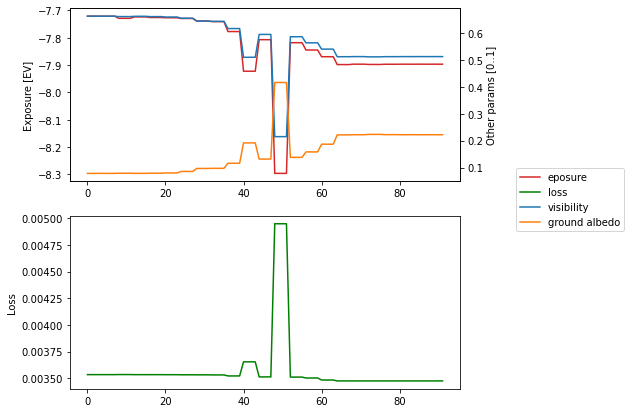

In [43]:
log = np.array(opt_params_log)
fig, ax = plt.subplots(2, figsize=(7, 7))
ax[0].plot(log[:, 0], color='C3', label='eposure')
ax[0].set_ylabel('Exposure [EV]')
#ax1.legend(loc=0)
ax_right = ax[0].twinx()
ax_right.plot(log[:, 1], color='C0', label='visibility')
ax_right.plot(log[:, 2], color='C1', label='ground albedo')
ax_right.set_ylabel('Other params [0..1]')

ax[1].plot(opt_loss_log, color='green', label='loss')
ax[1].set_ylabel('Loss')

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [44]:
# !!!!!!!!
#best_params = np.array(np.concatenate((best_params_exposure, best_params_visibility_groundalbedo), axis=None))
#best_params = np.array([-9.32998627, 0.50659084, 0.5219562])
#best_params = np.array([-7.8965339,  0.3, 0.22235802])

In [45]:
print('best:', best_params)
print('visibility:', make_visibility(best_params[1]), 'km')

best: [-7.8965339   0.51267808  0.22235802]
visibility: 77.31740985434274 km


In [46]:
_='''
image: '2019-06-24_0504_prague_chodska_21_rooftop', '0418'
    BFGS best:     [-7.89359811  0.51505535  0.21980024], error_value: 0.0034761305
    L-BFGS-B best: [-7.8965339   0.51267808  0.22235802], error_value: 0.0034761548
'''

In [47]:
_='''def plot_opt():
    
plot_opt(log, {
    'Exposure [EV]':       [(0, 'red', 'exposure')],
    'Other params [0..1]': [(0, 'red', 'exposure')]
})
'''

In [48]:
#plt.plot(np.array(opt_params_log)[:,0])
#plt.plot(np.array(opt_params_log)[:,1])
#plt.plot(np.array(opt_params_log)[:,2])

In [49]:
# convergence plot
#plt.yscale('log')
#plt.plot(opt_loss_log)

In [50]:
#used_params = opt_x
used_params = best_params

In [51]:
with open(mask_fname_base + 'used_params.txt', 'w') as f:
    f.write(repr(used_params.tolist()))
    f.write('\n')
    f.write(repr(opt_loss_log))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

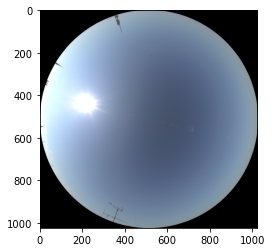

In [52]:
# real photograph
#plt.imshow(cv2.cvtColor(real_img*view_multiplier, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor((real_img*view_multiplier)**(1/2.2), cv2.COLOR_BGR2RGB))
#cv2.imwrite(mask_fname_base + 'real_image.png', real_img*view_multiplier*255)
cv2.imwrite(mask_fname_base + 'real_image.png', (real_img*view_multiplier)**(1/2.2)*255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


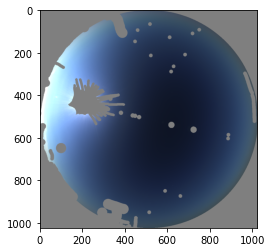

In [53]:
# real photograph, masked
plt.imshow(cv2.cvtColor((real_img*view_multiplier-0.5)*rgb_mask+0.5, cv2.COLOR_BGR2RGB))

In [55]:
generate_sky_image=generate_sky_image_exposure_visibility_groundalbedo

generate_sky_image( [-7.8965339048210925, 77.31740985434274, 0.22235801993227391] )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


generate_sky_image( [-7.8965339048210925, 77.31740985434274, 0.22235801993227391] )


True

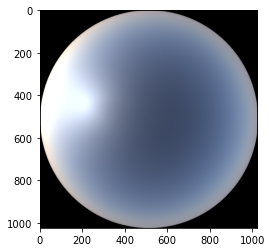

In [56]:
# generated sky-dome image
plt.imshow(cv2.cvtColor((generate_sky_image(used_params)*view_multiplier)**(1/2.2), cv2.COLOR_BGR2RGB))
#cv2.imwrite(mask_fname_base + 'generated_image.png', generate_sky_image(used_params)*view_multiplier*255)
cv2.imwrite(mask_fname_base + 'generated_image.png', (generate_sky_image(used_params)*view_multiplier)**(1/2.2)*255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


generate_sky_image( [-7.8965339048210925, 77.31740985434274, 0.22235801993227391] )


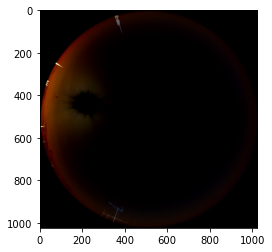

In [57]:
# difference image
plt.imshow(cv2.cvtColor((generate_sky_image(used_params)-real_img)*view_multiplier, cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


generate_sky_image( [-7.8965339048210925, 77.31740985434274, 0.22235801993227391] )


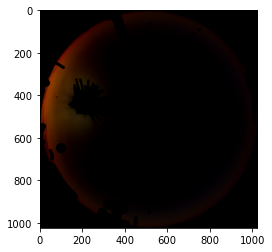

In [58]:
# difference image, masked
plt.imshow(cv2.cvtColor((generate_sky_image(used_params)-real_img)*rgb_mask*view_multiplier, cv2.COLOR_BGR2RGB))
#cv2.imwrite('masked_diff.exr', (generate_sky_image(used_params)-real_img)*rgb_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


generate_sky_image( [-7.8965339048210925, 77.31740985434274, 0.22235801993227391] )


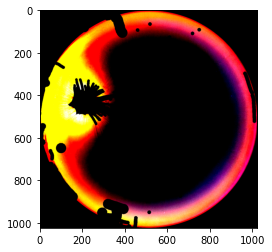

In [59]:
# The same masked difference image, just "amplified" (simulated ~16x longer exposure)
plt.imshow(cv2.cvtColor((generate_sky_image(used_params)-real_img)*rgb_mask*30*view_multiplier, cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


generate_sky_image( [-7.8965339048210925, 77.31740985434274, 0.22235801993227391] )
(1024, 1024, 3)


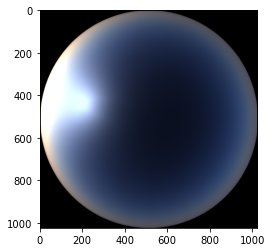

In [60]:
generated = cv2.cvtColor(generate_sky_image(used_params)*view_multiplier, cv2.COLOR_BGR2RGB)
#generated = generated[:,:,0]
print(generated.shape)
plt.imshow(generated)

In [61]:
!conda env export

/bin/bash: /home/dancejok/miniconda3/envs/sky/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
name: sky
channels:
  - conda-forge
  - defaults
dependencies:
  - _libgcc_mutex=0.1=main
  - _openmp_mutex=5.1=1_gnu
  - anyio=4.0.0=pyhd8ed1ab_0
  - argon2-cffi=23.1.0=pyhd8ed1ab_0
  - argon2-cffi-bindings=21.2.0=py38h0a891b7_2
  - asttokens=2.4.1=pyhd8ed1ab_0
  - async-lru=2.0.4=pyhd8ed1ab_0
  - attrs=23.1.0=pyh71513ae_1
  - babel=2.13.1=pyhd8ed1ab_0
  - backcall=0.2.0=pyh9f0ad1d_0
  - backports=1.0=pyhd8ed1ab_3
  - backports.functools_lru_cache=1.6.5=pyhd8ed1ab_0
  - beautifulsoup4=4.12.2=pyha770c72_0
  - blas=1.1=openblas
  - bleach=6.1.0=pyhd8ed1ab_0
  - bottleneck=1.3.5=py38h7deecbd_0
  - brotli=1.0.9=h9c3ff4c_4
  - brotli-python=1.0.9=py38hfa26641_7
  - bzip2=1.0.8=h7f98852_4
  - c-ares=1.19.1=h5eee18b_0
  - ca-certificates=2023.7.22=hbcca054_0
  - cairo=1.16.0=hb05425b_5
  - certifi=2023.7.22=pyhd8ed1ab_0
  - cffi

## generate secondary channels

In [39]:
import secondary_channels
secondary_channels.init(resolution)

/work/secondary_channels.py:62: RuntimeWarning: divide by zero encountered in true_divide
  distance_to_clouds = point[2] / direction[..., 2]
/work/secondary_channels.py:40: RuntimeWarning: invalid value encountered in true_divide
  phi = np.arctan(direction[...,1] / direction[...,0])


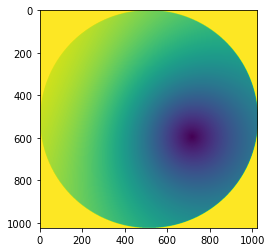

In [40]:
polar_distance = secondary_channels.polar_distance(secondary_channels.phi, secondary_channels.theta, sun_phi, sun_theta)
plt.imshow(polar_distance)

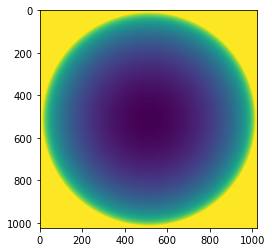

In [41]:
logdistance_to_clouds = np.log(secondary_channels.distance_to_clouds)
plt.imshow(logdistance_to_clouds)

In [42]:
np.expand_dims(polar_distance, 2).shape

(1024, 1024, 1)

In [43]:
np.expand_dims(logdistance_to_clouds, 2).shape

(1024, 1024, 1)

In [62]:
generated.dtype

dtype('float32')

In [53]:
# add the secondary channels to the generated clear-sky image
generated_with_secondary_channels = np.concatenate([
    generated,
    np.expand_dims(polar_distance, 2),
    np.expand_dims(logdistance_to_clouds, 2)
], axis=2)

(1024, 1024) float64


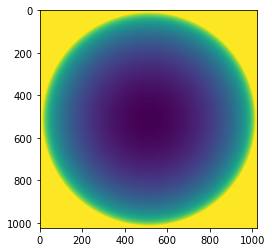

In [61]:
def bla(generated_with_secondary_channels):
    generated_with_secondary_channels = generated_with_secondary_channels[:,:,4]
    print(generated_with_secondary_channels.shape, generated_with_secondary_channels.dtype)
    plt.imshow(generated_with_secondary_channels)
bla(generated_with_secondary_channels)